## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
# import pydotplus

In [2]:
import time
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Read the Data from the CSV

In [4]:
cd C:\\Users\\hp\\Desktop\\Jupyter_Notebook\\DS_Tools

C:\Users\hp\Desktop\Jupyter_Notebook\DS_Tools


In [108]:
dummy_df = pd.read_csv("Datasets/bank.csv", na_values =['NA'])
temp = dummy_df.columns.values # storing column names in a numpy ndarray
temp

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [109]:
dummy_df.head() # viewing the top 5 rows of the dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [110]:
dummy_df.tail() # viewing the bottom 5 rows of the dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


# DATA CLEANING

In [111]:
dummy_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [10]:
#  setting the default figure size of plots per notebook via

plt.rcParams["figure.figsize"] = (1300/72., 4.8)

### poutcome

<AxesSubplot:xlabel='poutcome', ylabel='Count'>

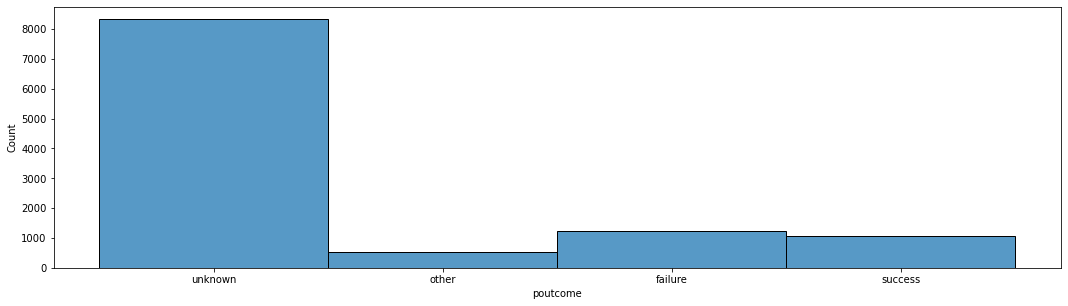

In [11]:
sns.histplot(data = dummy_df, x =  'poutcome')

# Histogram shows that more than 8000 data points of column poutcome are Unknown. Unknown is garbage data. 
# Since more than 70% of the column data is garbage, we can drop this column. 

In [12]:
dummy_df1 = dummy_df.drop(columns = ['contact', 'poutcome'], axis = 1)
dummy_df1.head()

# contact column will not affect any decision. Hence it has also been dropped. 

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,yes


### age

<AxesSubplot:xlabel='age'>

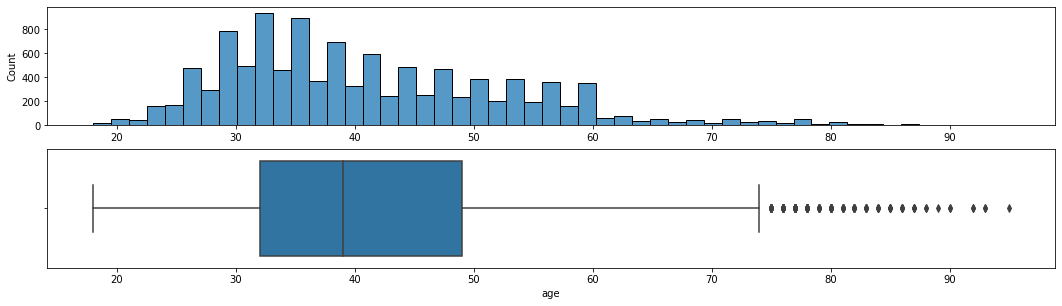

In [13]:
plt.subplot(2,1,1)
sns.histplot(data = dummy_df1, x = 'age')

plt.subplot(2,1,2)
sns.boxplot(data = dummy_df1, x = 'age')

# outliers above age 75

In [15]:
print(np.percentile(dummy_df1.age, 2.5))
print(np.percentile(dummy_df1.age, 97.5))

# since is data has more variance, taking interval of 95%
# setting lower outliers to 2.5 percentile, upper outliers to 97.5 percentile.

dummy_df1['age'] = np.where(dummy_df1['age']<24.0, 24.0, dummy_df1['age'])
dummy_df1['age'] = np.where(dummy_df1['age']>70.0, 70.0, dummy_df1['age'])

24.0
70.0


0.6511647184311444


<AxesSubplot:xlabel='age'>

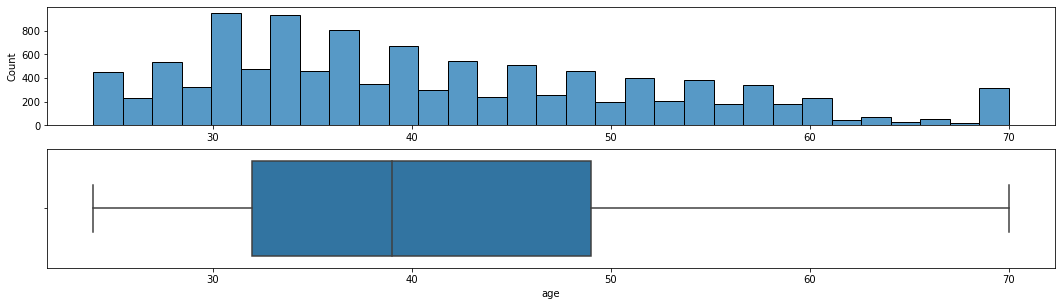

In [17]:
print(dummy_df1['age'].skew())
# the skewness value should be between -1 and +1
# and any major deviation from this range indicates the presence of extreme values.

plt.subplot(2,1,1)
sns.histplot(data = dummy_df1, x = 'age')

plt.subplot(2,1,2)
sns.boxplot(data = dummy_df1, x = 'age')

### job

<AxesSubplot:ylabel='None'>

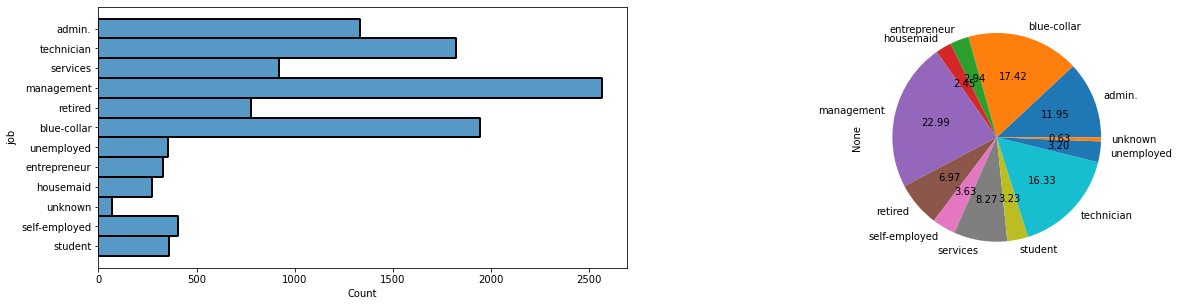

In [196]:
fig, axes = plt.subplots(figsize=(1500/72., 4.8)) # setting fig window size for a particular column

plt.subplot(1,2,1)
sns.histplot(data = dummy_df1, y = 'job')

plt.subplot(1,2,2)
dummy_df1.groupby('job').size().plot(kind = 'pie', autopct = '%.2f')

# 0.63% values are unknown. No need to remove them.

### marital

<AxesSubplot:ylabel='None'>

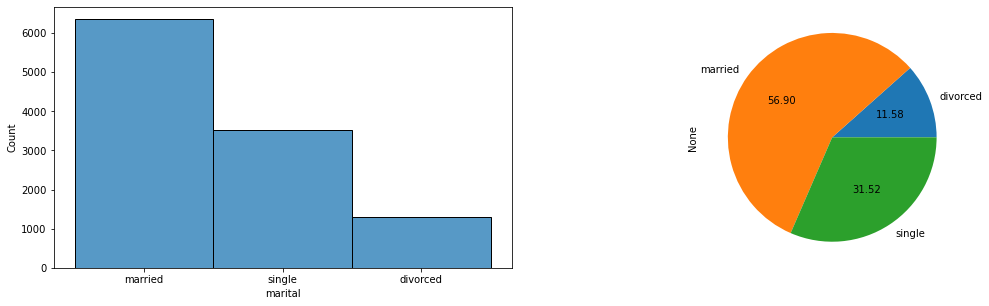

In [197]:
plt.subplot(1,2,1)
sns.histplot(data = dummy_df1, x = 'marital')

plt.subplot(1,2,2)
dummy_df1.groupby('marital').size().plot(kind='pie', autopct='%.2f')

### education

<AxesSubplot:ylabel='None'>

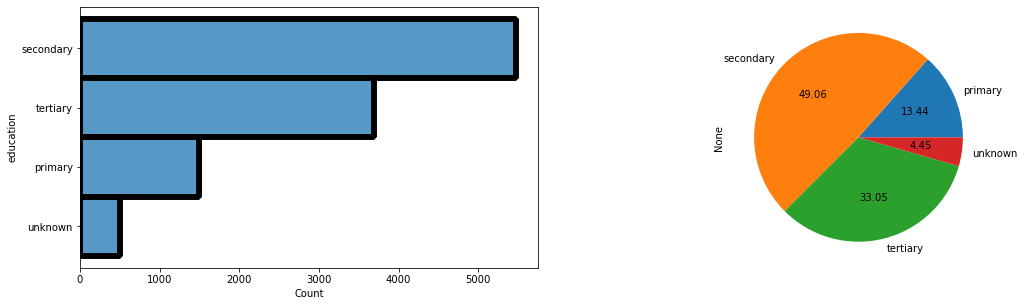

In [198]:
plt.subplot(1,2,1)
sns.histplot(data = dummy_df1, y = 'education')

plt.subplot(1,2,2)
dummy_df1.groupby('education').size().plot(kind='pie', autopct='%.2f')

# only 4.45% data is unknown. No need to remove it. 

### default

<AxesSubplot:ylabel='None'>

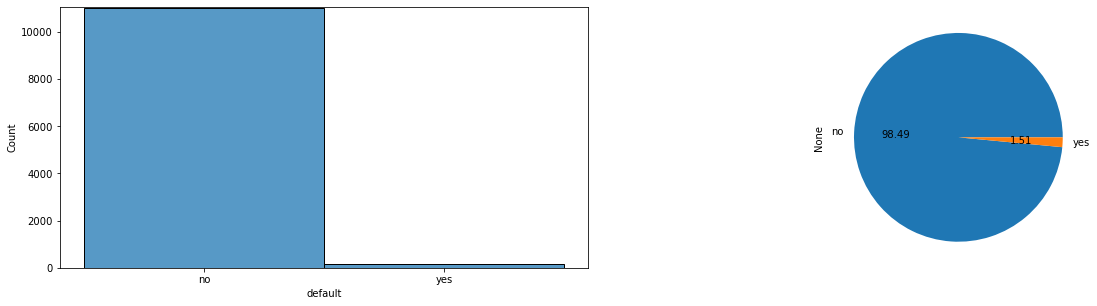

In [168]:
plt.subplot(1,2,1)
default_histplot = sns.histplot(data = dummy_df1, x = 'default')
default_histplot.set(ylim = (0, 11055))

plt.subplot(1,2,2)
dummy_df1.groupby('default').size().plot(kind='pie', autopct='%.2f')
# 98.49% of data for Default is Categorised as No. Statistically there is zero variance. 
# We can drop this column. 

In [50]:
dummy_df1 = dummy_df1.drop(columns = ['default'])
dummy_df1.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59.0,admin.,married,secondary,2343.0,yes,no,5,may,838.0,1.0,-1.0,0.0,yes
1,56.0,admin.,married,secondary,45.0,no,no,5,may,838.0,1.0,-1.0,0.0,yes
2,41.0,technician,married,secondary,1270.0,yes,no,5,may,838.0,1.0,-1.0,0.0,yes
3,55.0,services,married,secondary,2476.0,yes,no,5,may,579.0,1.0,-1.0,0.0,yes
4,54.0,admin.,married,tertiary,184.0,no,no,5,may,673.0,2.0,-1.0,0.0,yes


### balance

-54.94999999999993

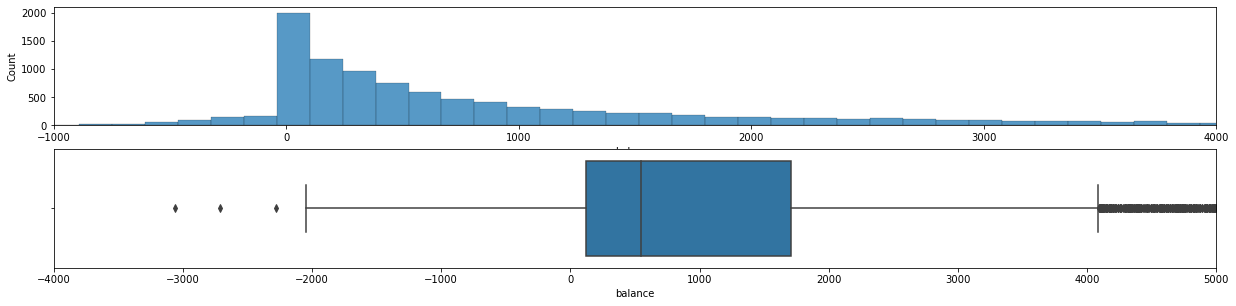

In [173]:
plt.subplot(2,1,1)
balance_histplot = sns.histplot(data = dummy_df1, x = 'balance')
balance_histplot.set(xlim = (-1000, 4000))

plt.subplot(2,1,2)
balance_boxplot = sns.boxplot(data = dummy_df1, x = 'balance')
balance_boxplot.set(xlim = (-4000, 5000))

dummy_df1.balance.describe()

# a lot of outliers in balance column. Need to be handled. 
# Setting all lower outliers to 10th percentile and upper outliers to 90th percentile


In [22]:
print(np.percentile(dummy_df1.balance, 15))
print(np.percentile(dummy_df1.balance, 85))

# capping to 15th percentile and flooring to 85th percentile. 

dummy_df1['balance'] = np.where(dummy_df1['balance']<9.0, 9.0, dummy_df1['balance'])
dummy_df1['balance'] = np.where(dummy_df1['balance']>2885.0, 2885.0, dummy_df1['balance'])

9.0
2885.0


0.8359191247698573


[(-4000.0, 5000.0)]

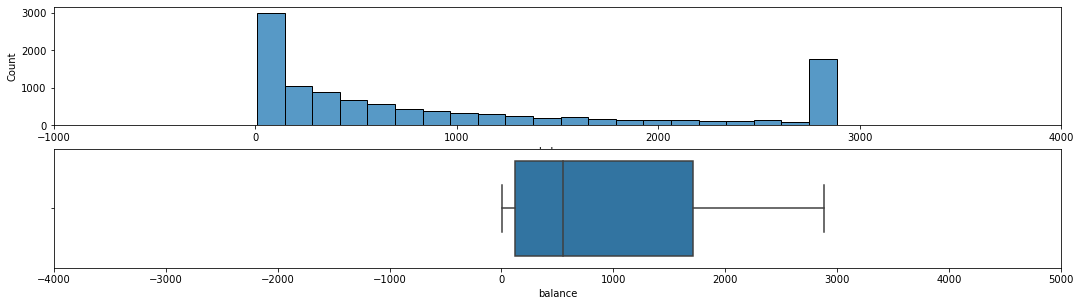

In [23]:
print(dummy_df1['balance'].skew())

plt.subplot(2,1,1)
balance_histplot = sns.histplot(data = dummy_df1, x = 'balance')
balance_histplot.set(xlim = (-1000, 4000))

plt.subplot(2,1,2)
balance_boxplot = sns.boxplot(data = dummy_df1, x = 'balance')
balance_boxplot.set(xlim = (-4000, 5000))

### housing

<AxesSubplot:ylabel='None'>

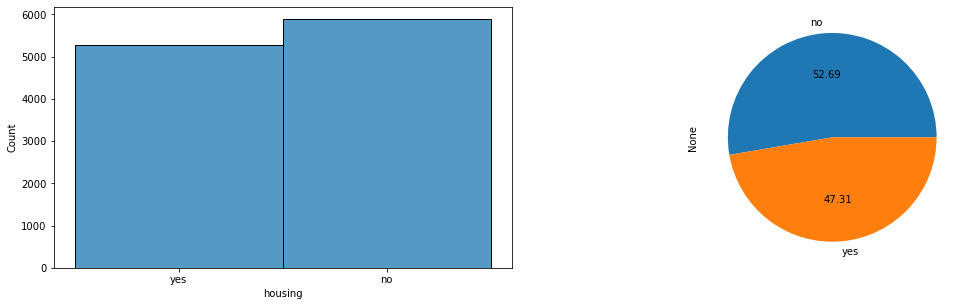

In [200]:
plt.subplot(1,2,1)
sns.histplot(data = dummy_df1, x = 'housing')

plt.subplot(1,2,2)
dummy_df1.groupby('housing').size().plot(kind = 'pie', autopct = '%.2f')

# no insight can be gained. 

### loan

<AxesSubplot:ylabel='None'>

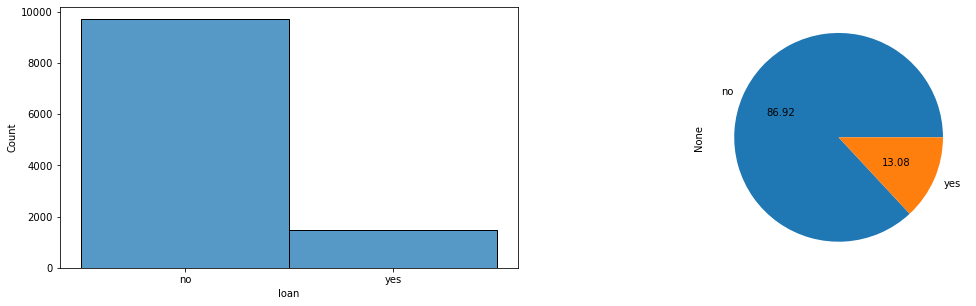

In [201]:
plt.subplot(1,2,1)
sns.histplot(data = dummy_df1, x = 'loan')

plt.subplot(1,2,2)
dummy_df1.groupby('loan').size().plot(kind = 'pie', autopct = '%.2f')

# 86.92% of the data for Loan is in category 'No'. Keeping for now.  

### day

<AxesSubplot:ylabel='None'>

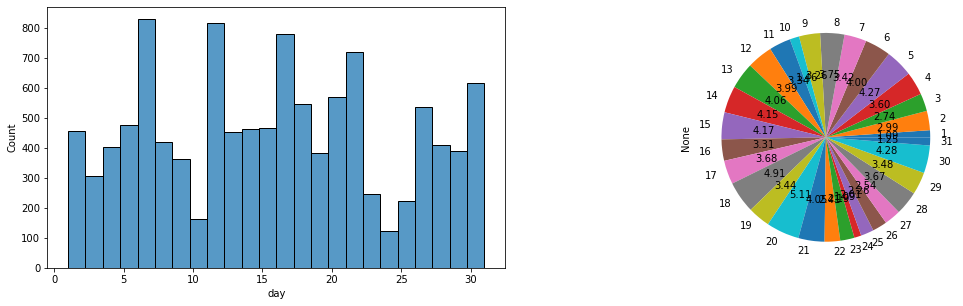

In [202]:
plt.subplot(1,2,1)
sns.histplot(data = dummy_df1, x = 'day')

plt.subplot(1,2,2)
dummy_df1.groupby('day').size().plot(kind = 'pie', autopct = '%.2f')

# no pattern can be seen. 

### month

<AxesSubplot:ylabel='None'>

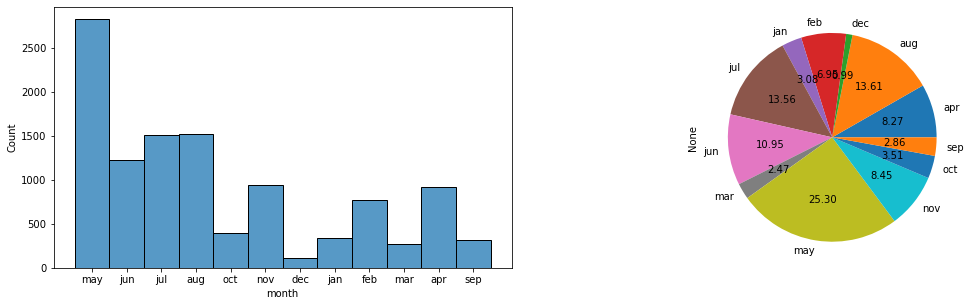

In [203]:
plt.subplot(1,2,1)
sns.histplot(data = dummy_df1, x = 'month')

plt.subplot(1,2,2)
dummy_df1.groupby('month').size().plot(kind = 'pie', autopct = '%.2f')

# no pattern can be seen. 

### duration

<AxesSubplot:xlabel='duration'>

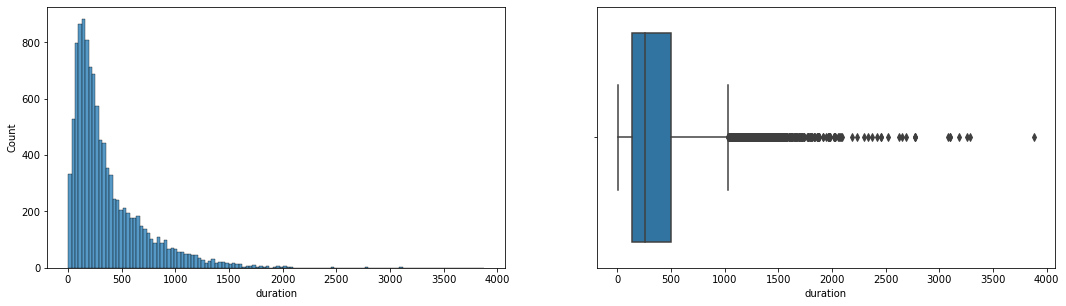

In [212]:
plt.subplot(1,2,1)
sns.histplot(data = dummy_df1, x = 'duration')

# plt.subplot(2,2,2)
# dummy_df1.groupby('duration').size().plot(kind = 'pie', autopct = '%.2f')
# Pie chart is unreadble

plt.subplot(1,2,2)
sns.boxplot(data = dummy_df1, x = 'duration')

# a lot of outliers. 

In [30]:
print(np.percentile(dummy_df1.duration, 10))
print(np.percentile(dummy_df1.duration, 90))

# capping to 10th percentile.
# flooring to 90th percentile.

dummy_df1['duration'] = np.where(dummy_df1['duration']<77.0, 77.0, dummy_df1['duration'])
dummy_df1['duration'] = np.where(dummy_df1['duration']>838.0, 838.0, dummy_df1['duration'])

77.0
838.0


0.8506119184251896


<AxesSubplot:xlabel='duration'>

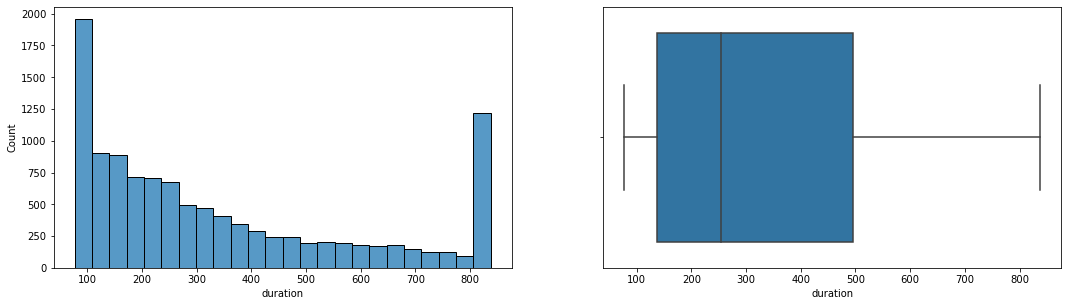

In [31]:
print(dummy_df1.duration.skew())

plt.subplot(1,2,1)
sns.histplot(data = dummy_df1, x = 'duration')

plt.subplot(1,2,2)
sns.boxplot(data = dummy_df1, x = 'duration')

### campaign

<AxesSubplot:xlabel='campaign'>

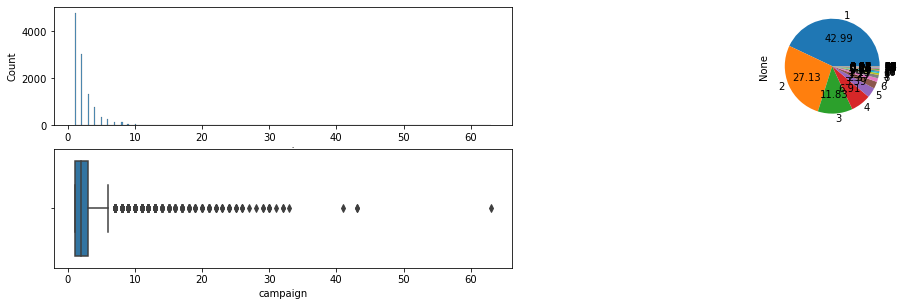

In [216]:
plt.subplot(2,2,1)
sns.histplot(data = dummy_df1, x = 'campaign')

plt.subplot(2,2,2)
dummy_df1.groupby('campaign').size().plot(kind = 'pie', autopct = '%.2f')

plt.subplot(2,2,3)
sns.boxplot(data = dummy_df1, x = 'campaign')

# a lot of upper outliers

In [39]:
print(np.percentile(dummy_df1.campaign, 90))

# flooring outliers to 90th percentile

dummy_df1['campaign'] = np.where(dummy_df1['campaign']>5.0, 5.0, dummy_df['campaign'])

5.0


0.9826361461567283


<AxesSubplot:xlabel='campaign'>

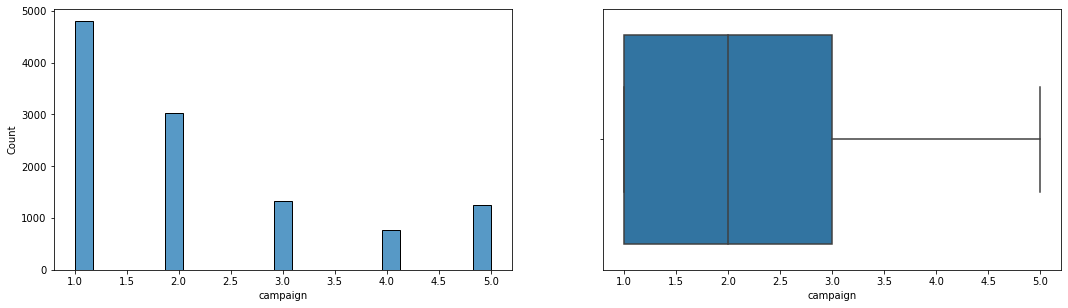

In [40]:
print(dummy_df1.campaign.skew())

plt.subplot(1,2,1)
sns.histplot(data = dummy_df1, x = 'campaign')

plt.subplot(1,2,2)
sns.boxplot(data = dummy_df1, x = 'campaign')

### pdays

<AxesSubplot:ylabel='None'>

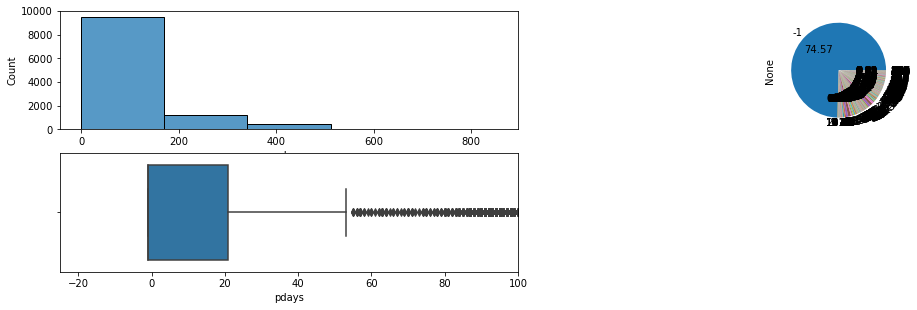

In [223]:
plt.subplot(2, 2, 1)
pday_plot = sns.histplot(data = dummy_df1, x = 'pdays', bins = 5)
pday_plot.set(ylim = (0, 10000))

plt.subplot(2, 2, 3)
pdays_box = sns.boxplot(data = dummy_df1, x = 'pdays')
pdays_box.set(xlim = (-25, 100))

plt.subplot(2, 2, 2)
dummy_df1.groupby('pdays').size().plot(kind = 'pie', autopct = '%.2f')


# 75% of pdays values = -1
# column can also be dropped. Keeping for now. 
# only upper outliers exist. 

In [42]:
dummy_df1.pdays.describe()

np.percentile(dummy_df1.pdays, 75)

# capping outliers to 75th percentile

dummy_df1['pdays'] = np.where(dummy_df1['pdays'] > 20.75, 20.75, dummy_df1['pdays'])  

1.145103118126808


<AxesSubplot:ylabel='None'>

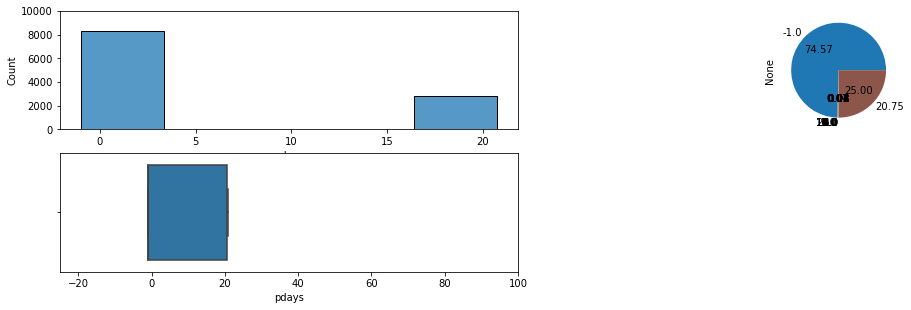

In [43]:
print(dummy_df1.pdays.skew())

plt.subplot(2, 2, 1)
pday_plot = sns.histplot(data = dummy_df1, x = 'pdays', bins = 5)
pday_plot.set(ylim = (0, 10000))

plt.subplot(2, 2, 3)
pdays_box = sns.boxplot(data = dummy_df1, x = 'pdays')
pdays_box.set(xlim = (-25, 100))

plt.subplot(2, 2, 2)
dummy_df1.groupby('pdays').size().plot(kind = 'pie', autopct = '%.2f')

### previous

<AxesSubplot:ylabel='None'>

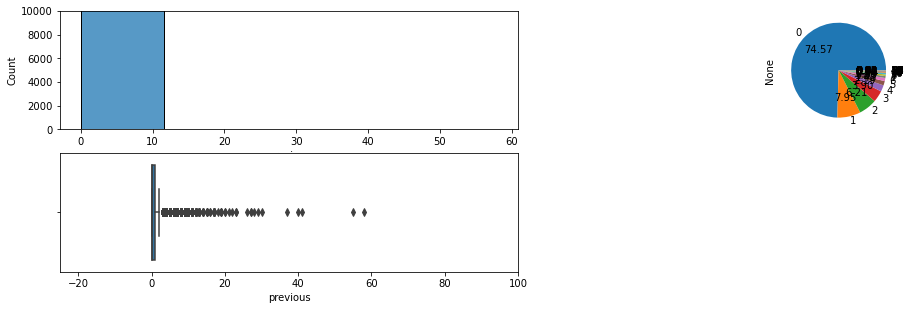

In [232]:
plt.subplot(2, 2, 1)
pday_plot = sns.histplot(data = dummy_df1, x = 'previous', bins = 5)
pday_plot.set(ylim = (0, 10000))

plt.subplot(2, 2, 3)
pdays_box = sns.boxplot(data = dummy_df1, x = 'previous')
pdays_box.set(xlim = (-25, 100))

plt.subplot(2, 2, 2)
dummy_df1.groupby('previous').size().plot(kind = 'pie', autopct = '%.2f')

# 75% of data in previous column = 0
# column can be dropped. Keeping for now. 
# upper outliers exist

In [46]:
np.percentile(dummy_df1.previous, 75)

# flooring upper outliers to 75th percentile

dummy_df1['previous'] = np.where(dummy_df1['previous']>1.0, 1.0, dummy_df1['previous'])

1.128864824207116


<AxesSubplot:ylabel='None'>

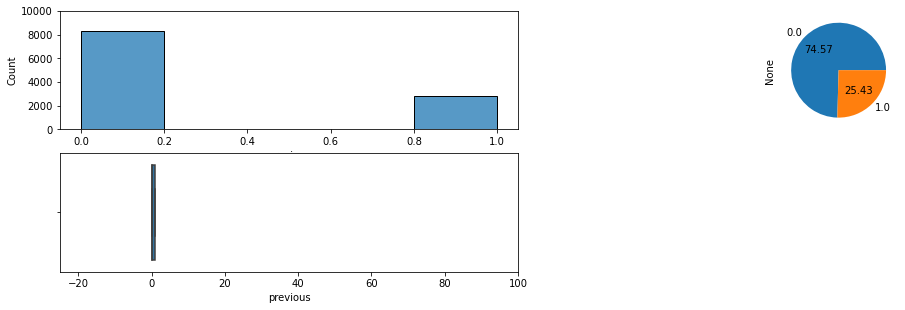

In [47]:
print(dummy_df1.previous.skew())

plt.subplot(2, 2, 1)
pday_plot = sns.histplot(data = dummy_df1, x = 'previous', bins = 5)
pday_plot.set(ylim = (0, 10000))

plt.subplot(2, 2, 3)
pdays_box = sns.boxplot(data = dummy_df1, x = 'previous')
pdays_box.set(xlim = (-25, 100))

plt.subplot(2, 2, 2)
dummy_df1.groupby('previous').size().plot(kind = 'pie', autopct = '%.2f')

## Handling Null Values

In [20]:
dummy_df1.isnull().sum()

# no null values in any column.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

## Handling Correlated Variables

In [17]:
dummy_df1.corr()

'''none of the numerical columns are more than 75% correlated. Hence, there are no twin columns.'''

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


### Handling Duplicates

In [48]:
# Dropping duplicate data rows

dummy_df3 = dummy_df1.drop_duplicates(subset = None, keep = False, inplace = False)

In [113]:
dummy_df3.info()

# no. of rows are still the same. There were no duplicate entries. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11160 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11160 non-null  float64
 1   job        11160 non-null  object 
 2   marital    11160 non-null  object 
 3   education  11160 non-null  object 
 4   default    11160 non-null  object 
 5   balance    11160 non-null  float64
 6   housing    11160 non-null  object 
 7   loan       11160 non-null  object 
 8   day        11160 non-null  int64  
 9   month      11160 non-null  object 
 10  duration   11160 non-null  float64
 11  campaign   11160 non-null  float64
 12  pdays      11160 non-null  float64
 13  previous   11160 non-null  float64
 14  deposit    11160 non-null  object 
dtypes: float64(6), int64(1), object(8)
memory usage: 1.4+ MB


## Creating a copy of the cleaned Data Frame

In [51]:
dummy_df_clean_copy = dummy_df1

## Creating different datasets by dropping various columns which we want to check

In [52]:
dummy_df1

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59.0,admin.,married,secondary,2343.0,yes,no,5,may,838.0,1.0,-1.00,0.0,yes
1,56.0,admin.,married,secondary,45.0,no,no,5,may,838.0,1.0,-1.00,0.0,yes
2,41.0,technician,married,secondary,1270.0,yes,no,5,may,838.0,1.0,-1.00,0.0,yes
3,55.0,services,married,secondary,2476.0,yes,no,5,may,579.0,1.0,-1.00,0.0,yes
4,54.0,admin.,married,tertiary,184.0,no,no,5,may,673.0,2.0,-1.00,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,9.0,yes,no,20,apr,257.0,1.0,-1.00,0.0,no
11158,39.0,services,married,secondary,733.0,no,no,16,jun,83.0,4.0,-1.00,0.0,no
11159,32.0,technician,single,secondary,29.0,no,no,19,aug,156.0,2.0,-1.00,0.0,no
11160,43.0,technician,married,secondary,9.0,no,yes,8,may,77.0,2.0,20.75,1.0,no


In [99]:
dummy_df_sans_loan = dummy_df1.drop(columns = ['loan']) 
dummy_df_sans_loan.head()

,age,job,marital,education,balance,housing,day,month,duration,campaign,pdays,previous,deposit
0,59.0,admin.,married,secondary,2343.0,yes,5,may,838.0,1.0,-1.0,0.0,yes
1,56.0,admin.,married,secondary,45.0,no,5,may,838.0,1.0,-1.0,0.0,yes
2,41.0,technician,married,secondary,1270.0,yes,5,may,838.0,1.0,-1.0,0.0,yes
3,55.0,services,married,secondary,2476.0,yes,5,may,579.0,1.0,-1.0,0.0,yes
4,54.0,admin.,married,tertiary,184.0,no,5,may,673.0,2.0,-1.0,0.0,yes


In [100]:
dummy_df_sans_previous = dummy_df1.drop(columns = ['previous'])
dummy_df_sans_previous.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,deposit
0,59.0,admin.,married,secondary,2343.0,yes,no,5,may,838.0,1.0,-1.0,yes
1,56.0,admin.,married,secondary,45.0,no,no,5,may,838.0,1.0,-1.0,yes
2,41.0,technician,married,secondary,1270.0,yes,no,5,may,838.0,1.0,-1.0,yes
3,55.0,services,married,secondary,2476.0,yes,no,5,may,579.0,1.0,-1.0,yes
4,54.0,admin.,married,tertiary,184.0,no,no,5,may,673.0,2.0,-1.0,yes


In [101]:
dummy_df_sans_pdays = dummy_df1.drop(columns = ['pdays'])
dummy_df_sans_pdays.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,previous,deposit
0,59.0,admin.,married,secondary,2343.0,yes,no,5,may,838.0,1.0,0.0,yes
1,56.0,admin.,married,secondary,45.0,no,no,5,may,838.0,1.0,0.0,yes
2,41.0,technician,married,secondary,1270.0,yes,no,5,may,838.0,1.0,0.0,yes
3,55.0,services,married,secondary,2476.0,yes,no,5,may,579.0,1.0,0.0,yes
4,54.0,admin.,married,tertiary,184.0,no,no,5,may,673.0,2.0,0.0,yes


## Creating a dataframe without droppable columns

In [102]:
dummy_df_sans = dummy_df1.drop(columns = ['loan', 'previous', 'pdays'])
dummy_df_sans.head()

,age,job,marital,education,balance,housing,day,month,duration,campaign,deposit
0,59.0,admin.,married,secondary,2343.0,yes,5,may,838.0,1.0,yes
1,56.0,admin.,married,secondary,45.0,no,5,may,838.0,1.0,yes
2,41.0,technician,married,secondary,1270.0,yes,5,may,838.0,1.0,yes
3,55.0,services,married,secondary,2476.0,yes,5,may,579.0,1.0,yes
4,54.0,admin.,married,tertiary,184.0,no,5,may,673.0,2.0,yes


## Data Pre-Processing

### dummy_df1

In [58]:
contact_df = dummy_df1

In [78]:
def preprocessor1(df): # defining a function which takes a dataframe as argument
    res_df = df.copy() # creating a copy of the dataframe passed into the function
    le = preprocessing.LabelEncoder() # Encodes labels with numerical values between 0 and (n-1)
    
    
    # fit_transform() takes the label as argument, and returns encoded labels
    # We are encodining columns with non-numerical data 
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
#     res_df['default'] = le.fit_transform(res_df['default']) - column removed from dataset
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
#     res_df['contact'] = le.fit_transform(res_df['contact']) - column removed from dataset
    res_df['day'] = le.fit_transform(res_df['day'])
#     res_df['poutcome'] = le.fit_transform(res_df['poutcome']) - column removed from dataset
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [79]:
encoded_df = preprocessor1(contact_df)
encoded_df

x = encoded_df.drop(['deposit'],axis =1).values # storing independent variables in x 
y = encoded_df['deposit'].values # storing target variable in y

In [103]:
encoded_df.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59.0,0,1,1,2343.0,1,0,4,8,838.0,1.0,-1.0,0.0,1
1,56.0,0,1,1,45.0,0,0,4,8,838.0,1.0,-1.0,0.0,1
2,41.0,9,1,1,1270.0,1,0,4,8,838.0,1.0,-1.0,0.0,1
3,55.0,7,1,1,2476.0,1,0,4,8,579.0,1.0,-1.0,0.0,1
4,54.0,0,1,2,184.0,0,0,4,8,673.0,2.0,-1.0,0.0,1


### dummy_df_sans_loan

In [68]:
contact_df_sans_loan = dummy_df_sans_loan

In [80]:
def preprocessor2(df): # defining a function which takes a dataframe as argument
    res_df = df.copy() # creating a copy of the dataframe passed into the function
    le = preprocessing.LabelEncoder() # Encodes labels with numerical values between 0 and (n-1)
    
    
    # fit_transform() takes the label as argument, and returns encoded labels
    # We are encodining columns with non-numerical data 
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
#     res_df['default'] = le.fit_transform(res_df['default']) - column removed from dataset
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
#     res_df['loan'] = le.fit_transform(res_df['loan'])
#     res_df['contact'] = le.fit_transform(res_df['contact']) - column removed from dataset
    res_df['day'] = le.fit_transform(res_df['day'])
#     res_df['poutcome'] = le.fit_transform(res_df['poutcome']) - column removed from dataset
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [81]:
encoded_df_sans_loan = preprocessor2(contact_df_sans_loan)
encoded_df_sans_loan

x_sans_loan = encoded_df_sans_loan.drop(['deposit'],axis =1).values # storing independent variables in x 
y_sans_loan = encoded_df_sans_loan['deposit'].values # storing target variable in y

In [104]:
encoded_df_sans_loan.head()

,age,job,marital,education,balance,housing,day,month,duration,campaign,pdays,previous,deposit
0,59.0,0,1,1,2343.0,1,4,8,838.0,1.0,-1.0,0.0,1
1,56.0,0,1,1,45.0,0,4,8,838.0,1.0,-1.0,0.0,1
2,41.0,9,1,1,1270.0,1,4,8,838.0,1.0,-1.0,0.0,1
3,55.0,7,1,1,2476.0,1,4,8,579.0,1.0,-1.0,0.0,1
4,54.0,0,1,2,184.0,0,4,8,673.0,2.0,-1.0,0.0,1


### dummy_df_sans_previous

In [72]:
contact_df_sans_previous = dummy_df_sans_previous

In [88]:
encoded_df_sans_previous = preprocessor1(contact_df_sans_previous)
encoded_df_sans_previous

x_sans_previous = encoded_df_sans_previous.drop(['deposit'],axis =1).values # storing independent variables in x 
y_sans_previous = encoded_df_sans_previous['deposit'].values # storing target variable in y

In [105]:
encoded_df_sans_previous.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,deposit
0,59.0,0,1,1,2343.0,1,0,4,8,838.0,1.0,-1.0,1
1,56.0,0,1,1,45.0,0,0,4,8,838.0,1.0,-1.0,1
2,41.0,9,1,1,1270.0,1,0,4,8,838.0,1.0,-1.0,1
3,55.0,7,1,1,2476.0,1,0,4,8,579.0,1.0,-1.0,1
4,54.0,0,1,2,184.0,0,0,4,8,673.0,2.0,-1.0,1


### dummy_df_sans_pdays

In [86]:
contact_df_sans_pdays = dummy_df_sans_pdays

In [90]:
encoded_df_sans_pdays = preprocessor1(contact_df_sans_pdays)
encoded_df_sans_pdays

x_sans_pdays = encoded_df_sans_pdays.drop(['deposit'],axis =1).values # storing independent variables in x 
y_sans_pdays = encoded_df_sans_pdays['deposit'].values # storing target variable in y

In [106]:
encoded_df_sans_pdays.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,previous,deposit
0,59.0,0,1,1,2343.0,1,0,4,8,838.0,1.0,0.0,1
1,56.0,0,1,1,45.0,0,0,4,8,838.0,1.0,0.0,1
2,41.0,9,1,1,1270.0,1,0,4,8,838.0,1.0,0.0,1
3,55.0,7,1,1,2476.0,1,0,4,8,579.0,1.0,0.0,1
4,54.0,0,1,2,184.0,0,0,4,8,673.0,2.0,0.0,1


### dummy_df_sans

In [92]:
contact_df_sans = dummy_df_sans

In [93]:
encoded_df_sans = preprocessor2(contact_df_sans)
encoded_df_sans

x_sans = encoded_df_sans.drop(['deposit'],axis =1).values # storing independent variables in x 
y_sans = encoded_df_sans['deposit'].values # storing target variable in y

In [107]:
encoded_df_sans.head()

,age,job,marital,education,balance,housing,day,month,duration,campaign,deposit
0,59.0,0,1,1,2343.0,1,4,8,838.0,1.0,1
1,56.0,0,1,1,45.0,0,4,8,838.0,1.0,1
2,41.0,9,1,1,1270.0,1,4,8,838.0,1.0,1
3,55.0,7,1,1,2476.0,1,4,8,579.0,1.0,1
4,54.0,0,1,2,184.0,0,4,8,673.0,2.0,1


## Split the data into Train-Test

### dummy_df1

In [65]:
# We need training data and testing data for the model
# x_train holds the training data without the target variable
# y_train holds the training data's target variable. 
# For calculating Training accuracy, we will pass x_train into the model aftrain it has been trained, and compare the
# results against y_train. 
# x_test holds the testing data without the target variable.
# y_test holds the target variable of the testing data against which the accuracy of the model will be tested. 


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.25) # testing data = 0.25 or 25%

### dummy_df_sans_loan

In [95]:
x_sans_loan_train, x_sans_loan_test, y_sans_loan_train, y_sans_loan_test = train_test_split(x_sans_loan,y_sans_loan,test_size =0.25) # testing data = 0.25 or 25%

### dummy_df_sans_previous

In [96]:
x_sans_previous_train, x_sans_previous_test, y_sans_previous_train, y_sans_previous_test = train_test_split(x_sans_previous,y_sans_previous,test_size =0.25) # testing data = 0.25 or 25%

### dummy_df_sans_pdays

In [97]:
x_sans_pdays_train, x_sans_pdays_test, y_sans_pdays_train, y_sans_pdays_test = train_test_split(x_sans_pdays,y_sans_pdays,test_size =0.25) # testing data = 0.25 or 25%

### dummy_df_sans

In [98]:
x_sans_train, x_sans_test, y_sans_train, y_sans_test = train_test_split(x_sans,y_sans,test_size =0.25) # testing data = 0.25 or 25%

## Build the Decision Tree Model

### dummy_df1

In [177]:
# Decision tree with depth = 2

model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2, criterion = "gini",
                                    min_samples_split = 100, min_samples_leaf = 30) # random_state shuffles the data.
model_dt_2.fit(x_train, y_train) # model is trained 
model_dt_2_score_train = model_dt_2.score(x_train, y_train) # calculating training accuracy
print("Training score: ",model_dt_2_score_train) 
model_dt_2_score_test = model_dt_2.score(x_test, y_test) # calculating testing accuracy
print("Testing score: ",model_dt_2_score_test)
# y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.710428861545813
Testing score:  0.7137226800429953


In [178]:
# Decision tree with depth = 4
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4, criterion = "gini",
                                    min_samples_split = 50, min_samples_leaf = 20)
model_dt_4.fit(x_train, y_train)
model_dt_4_score_train = model_dt_4.score(x_train, y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(x_test, y_test)
print("Testing score: ",model_dt_4_score_test)

'''Testing And Training Accuracy has increased by 7.5 % from the previous model.'''

Training score:  0.7899892485963446
Testing score:  0.7774991042637047


'Testing And Training Accuracy has increased by 7.5 % from the previous model.'

In [179]:
# Decision tree with depth = 6
model_dt_6 = DecisionTreeClassifier(random_state=1, max_depth=6, min_samples_split = 100, min_samples_leaf = 10)
model_dt_6.fit(x_train, y_train)
model_dt_6_score_train = model_dt_6.score(x_train, y_train)
print("Training score: ",model_dt_6_score_train)
model_dt_6_score_test = model_dt_6.score(x_test, y_test)
print("Testing score: ",model_dt_6_score_test)

'''Training and Testing Accuracy has increased by 2.5% from the previous model.'''

Training score:  0.8070720344044917
Testing score:  0.790756001433178


'Training and Testing Accuracy has increased by 2.5% from the previous model.'

In [180]:
# Decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini", 
                                    min_samples_split = 60, min_samples_leaf = 15)
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)


Training score:  0.8286943017560626
Testing score:  0.8058043711931208


In [181]:
# Decision tree with depth = 9
model_dt_9 = DecisionTreeClassifier(random_state=1, max_depth=9, criterion = "gini", 
                                     min_samples_split = 60, min_samples_leaf = 15)
model_dt_9.fit(x_train, y_train)
model_dt_9_score_train = model_dt_9.score(x_train, y_train)
print("Training score: ",model_dt_9_score_train)
model_dt_9_score_test = model_dt_9.score(x_test, y_test)
print("Testing score: ",model_dt_9_score_test)

Training score:  0.8343089236650341
Testing score:  0.8086707273378717


In [205]:
# Decision tree with depth = 10
model_dt_10 = DecisionTreeClassifier(random_state=1, max_depth=10, criterion = "gini", 
                                     min_samples_split = 60, min_samples_leaf = 15)
model_dt_10.fit(x_train, y_train)
model_dt_10_score_train = model_dt_10.score(x_train, y_train)
print("Training score: ",model_dt_10_score_train)
model_dt_10_score_test = model_dt_10.score(x_test, y_test)
print("Testing score: ",model_dt_10_score_test)

'''BEST MODEL BY HIT AND TRIAL'''

Training score:  0.8370565045992115
Testing score:  0.813686850591186


'BEST MODEL BY HIT AND TRIAL'

In [206]:
# Decision tree with depth = 11
model_dt_11 = DecisionTreeClassifier(random_state=1, max_depth=11, criterion = "gini", 
                                     min_samples_split = 55, min_samples_leaf = 15)
model_dt_11.fit(x_train, y_train)
model_dt_11_score_train = model_dt_11.score(x_train, y_train)
print("Training score: ",model_dt_11_score_train)
model_dt_11_score_test = model_dt_11.score(x_test, y_test)
print("Testing score: ",model_dt_11_score_test)

'''Testing Accuracy has increased by 0.3% 
   Training Accuracy has decreased by 0.25%'''

Training score:  0.8399235455740055
Testing score:  0.8115370834826228


'Testing Accuracy has increased by 0.3% \n   Training Accuracy has decreased by 0.25%'

In [210]:
# Decision tree with depth = 12
model_dt_12 = DecisionTreeClassifier(random_state=1, max_depth=12, criterion = "gini", 
                                     min_samples_split = 55, min_samples_leaf = 15)
model_dt_12.fit(x_train, y_train)
model_dt_12_score_train = model_dt_12.score(x_train, y_train)
print("Training score: ",model_dt_12_score_train)
model_dt_12_score_test = model_dt_12.score(x_test, y_test)
print("Testing score: ",model_dt_12_score_test)

'''Testing Accuracy has increased by 0.15% 
   Training Accuracy has no change.'''

Training score:  0.8413570660614025
Testing score:  0.8115370834826228


'Testing Accuracy has increased by 0.15% \n   Training Accuracy has no change.'

In [221]:
# Decision tree with depth = 13
model_dt_13 = DecisionTreeClassifier(random_state=1, max_depth=13, criterion = "gini", 
                                     min_samples_split = 60, min_samples_leaf = 15)
model_dt_13.fit(x_train, y_train)
model_dt_13_score_train = model_dt_13.score(x_train, y_train)
print("Training score: ",model_dt_13_score_train)
model_dt_13_score_test = model_dt_13.score(x_test, y_test)
print("Testing score: ",model_dt_13_score_test)

'''Similar to model_dt_10, but greater difference between training and testing score.
Training and Testing score should be statistically equal to prevent overfitting. 
So Model 10 would be a better mode.'''


Training score:  0.8411181459801697
Testing score:  0.8133285560730921


'Similar to model_dt_10, but greater difference between training and testing score.\nTraining and Testing score should be statistically equal to prevent overfitting. \nSo Model 10 would be a better mode.'

In [230]:
# Decision tree with depth = 14
model_dt_14 = DecisionTreeClassifier(random_state=1, max_depth=14, criterion = "gini", 
                                     min_samples_split = 60, min_samples_leaf = 15)
model_dt_14.fit(x_train, y_train)
model_dt_14_score_train = model_dt_14.score(x_train, y_train)
print("Training score: ",model_dt_14_score_train)
model_dt_14_score_test = model_dt_14.score(x_test, y_test)
print("Testing score: ",model_dt_14_score_test)

'''Increase in Training Score and No change in Testing Score.
   Model tending towards overfitting. Previous model was better. '''

Training score:  0.842671126508183
Testing score:  0.8133285560730921


'Increase in Training Score and Decrease in Testing Score.\n   Model tending towards overfitting. Previous model was better. '

In [232]:
model_dt = DecisionTreeClassifier(random_state = 1)

# GridSearchCV

In [233]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [8, 9, 10, 11, 12, 13, 14],
              'min_samples_split':[50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              'min_samples_leaf':list(range(5, 22, 2)),              
              'criterion': ['gini']}

model_dt_cv = GridSearchCV(model_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 2)

print('Best Parameters using grid search: \n', model_dt_cv.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 15, 'min_samples_split': 65}
Time taken in grid search:  78.30


## PERFORMANCE METRICS

### dummy_df1

In [297]:
model_dt_cv.fit(x_train, y_train)

model_dt_cv_score_train = model_dt_cv.score(x_train, y_train)
print("Training score: ",model_dt_cv_score_train)
model_dt_cv_score_test = model_dt_cv.score(x_test, y_test)
print("Testing score: ",model_dt_cv_score_test)

Training score:  0.8390873252896905
Testing score:  0.8111787889645289


In [298]:
#Decision tree
y_pred_dt = model_dt_cv.predict_proba(x_test)[:, 1] # giving probability of predicting 1 for each row in data set.
# that means for each row-wise combination of the attributes, the probability of predicting 1 is stored in the array
y_pred_dt

array([0.92105263, 0.86      , 0.        , ..., 0.        , 0.41071429,
       0.        ])

In [299]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt) # making the roc curve
roc_auc_dt = auc(fpr_dt, tpr_dt) # calculating area under the roc curve
roc_auc_dt

0.8697191367084305

In [300]:
predictions = model_dt_cv.predict(x_test)
predictions

array([1, 1, 0, ..., 0, 0, 0])

In [301]:
y_actual_result = 0

for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

In [302]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.7883636363636364


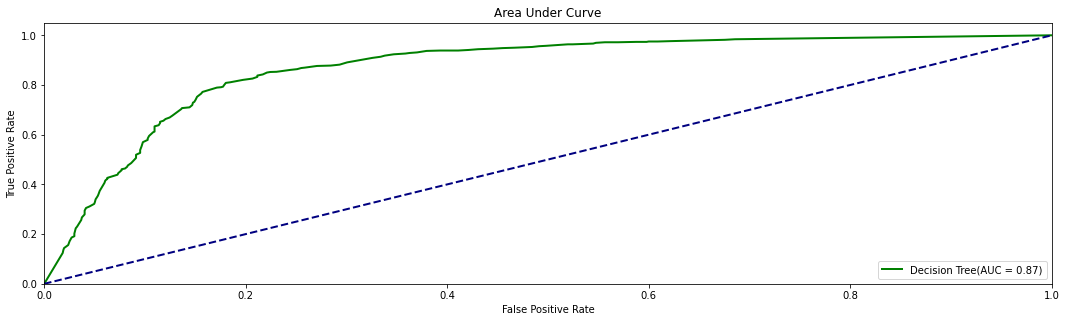

In [303]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [304]:
print (confusion_matrix(y_test, predictions))

[[1180  290]
 [ 237 1084]]


In [305]:
accuracy_score(y_test, predictions)

0.8111787889645289

In [306]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

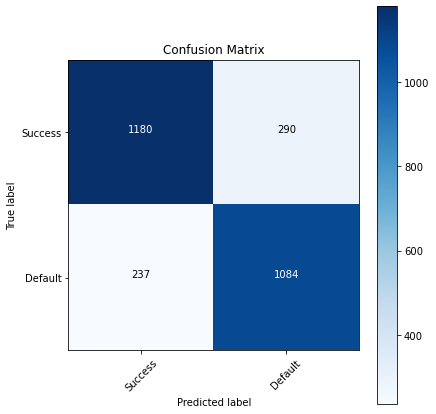

In [307]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

### dummy_df_sans_loan

In [308]:
model_dt_cv.fit(x_sans_loan_train, y_sans_loan_train)

model_dt_cv_score_train = model_dt_cv.score(x_sans_loan_train, y_sans_loan_train)
print("Training score: ",model_dt_cv_score_train)
model_dt_cv_score_test = model_dt_cv.score(x_sans_loan_test, y_sans_loan_test)
print("Testing score: ",model_dt_cv_score_test)

Training score:  0.8487635885796201
Testing score:  0.8040128986026513


In [309]:
y_pred_dt1 = model_dt_cv.predict_proba(x_sans_loan_test)[:, 1]

In [310]:
fpr_dt1, tpr_dt1, _ = roc_curve(y_sans_loan_test, y_pred_dt1) # making the roc curve
roc_auc_dt1 = auc(fpr_dt1, tpr_dt1) # calculating area under the roc curve
roc_auc_dt1

0.8681191020691174

In [311]:
predictions1 = model_dt_cv.predict(x_sans_loan_test)
predictions1

array([0, 0, 1, ..., 1, 1, 1])

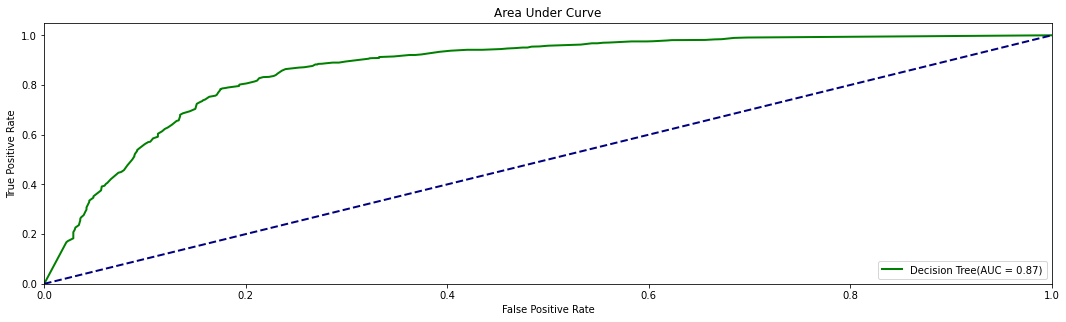

In [312]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt1, tpr_dt1, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [313]:
print (confusion_matrix(y_sans_loan_test, predictions1))

[[1171  282]
 [ 265 1073]]


In [314]:
accuracy_score(y_sans_loan_test, predictions1)

0.8040128986026513

In [315]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_sans_loan_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

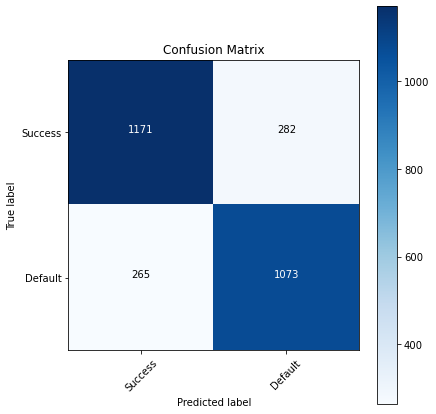

In [316]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions1, normalize=False)
plt.show()

### dummy_df_sans_previous

In [317]:
model_dt_cv.fit(x_sans_previous_train, y_sans_previous_train)

model_dt_cv_score_train = model_dt_cv.score(x_sans_previous_train, y_sans_previous_train)
print("Training score: ",model_dt_cv_score_train)
model_dt_cv_score_test = model_dt_cv.score(x_sans_previous_test, y_sans_previous_test)
print("Testing score: ",model_dt_cv_score_test)

Training score:  0.83777326484291
Testing score:  0.8118953780007165


In [318]:
y_pred_dt2 = model_dt_cv.predict_proba(x_sans_previous_test)[:, 1]

In [319]:
fpr_dt2, tpr_dt2, _ = roc_curve(y_sans_previous_test, y_pred_dt2) # making the roc curve
roc_auc_dt2 = auc(fpr_dt2, tpr_dt2) # calculating area under the roc curve
roc_auc_dt2

0.8838293690793357

In [320]:
predictions2 = model_dt_cv.predict(x_sans_previous_test)
predictions2

array([0, 0, 0, ..., 0, 1, 1])

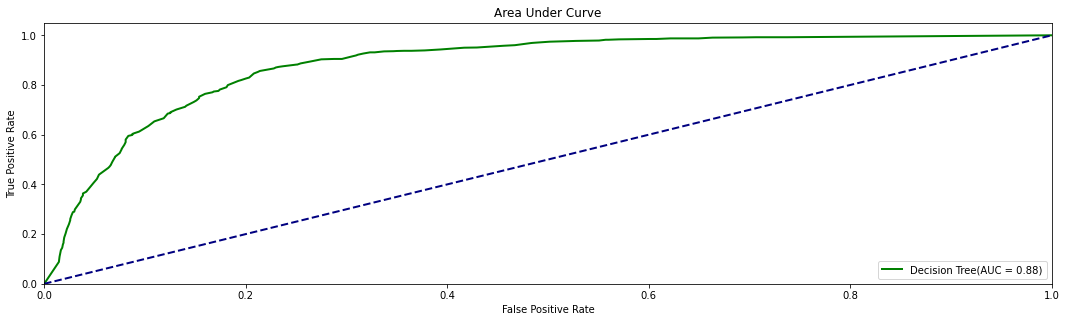

In [321]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt2, tpr_dt2, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [322]:
print (confusion_matrix(y_sans_previous_test, predictions2))

[[1207  302]
 [ 223 1059]]


In [323]:
accuracy_score(y_sans_previous_test, predictions2)

0.8118953780007165

In [324]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_sans_previous_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

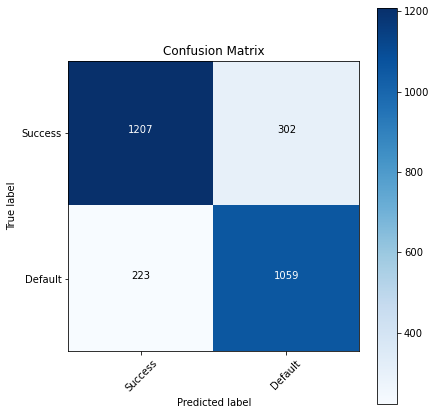

In [325]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions2, normalize=False)
plt.show()

### dummy_df_sans_pdays

In [326]:
model_dt_cv.fit(x_sans_pdays_train, y_sans_pdays_train)

model_dt_cv_score_train = model_dt_cv.score(x_sans_pdays_train, y_sans_pdays_train)
print("Training score: ",model_dt_cv_score_train)
model_dt_cv_core_test = model_dt_cv.score(x_sans_pdays_test, y_sans_pdays_test)
print("Testing score: ",model_dt_cv_score_test)

Training score:  0.8442241070361964
Testing score:  0.8118953780007165


In [327]:
y_pred_dt3 = model_dt_cv.predict_proba(x_sans_pdays_test)[:, 1]

In [328]:
fpr_dt3, tpr_dt3, _ = roc_curve(y_sans_pdays_test, y_pred_dt3) # making the roc curve
roc_auc_dt3 = auc(fpr_dt3, tpr_dt3) # calculating area under the roc curve
roc_auc_dt3

0.8692633830275941

In [329]:
predictions3 = model_dt_cv.predict(x_sans_pdays_test)
predictions3

array([1, 1, 0, ..., 0, 1, 1])

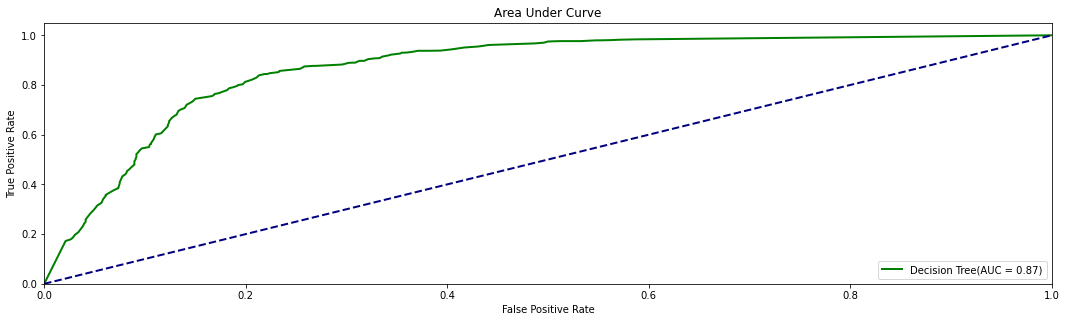

In [330]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt3, tpr_dt3, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [331]:
print (confusion_matrix(y_sans_pdays_test, predictions3))

[[1207  301]
 [ 240 1043]]


In [332]:
accuracy_score(y_sans_pdays_test, predictions3)

0.8061626657112146

In [333]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_sans_pdays_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

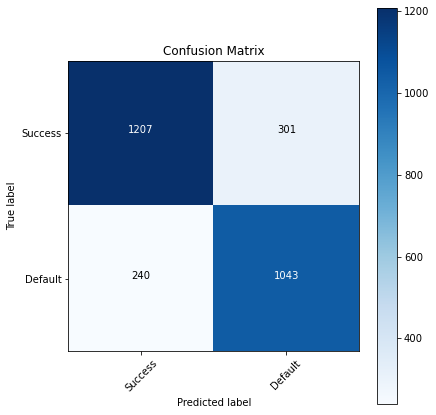

In [334]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions3, normalize=False)
plt.show()

### dummy_df_sans

In [335]:
model_dt_cv.fit(x_sans_train, y_sans_train)

model_dt_cv_score_train = model_dt_cv.score(x_sans_train, y_sans_train)
print("Training score: ",model_dt_cv_score_train)
model_dt_cv_core_test = model_dt_cv.score(x_sans_test, y_sans_test)
print("Testing score: ",model_dt_cv_score_test)

Training score:  0.8265440210249672
Testing score:  0.8118953780007165


In [337]:
y_pred_dt4 = model_dt_cv.predict_proba(x_sans_test)[:, 1]

In [338]:
fpr_dt4, tpr_dt4, _ = roc_curve(y_sans_test, y_pred_dt4) # making the roc curve
roc_auc_dt4 = auc(fpr_dt4, tpr_dt4) # calculating area under the roc curve
roc_auc_dt4

0.8715013902238267

In [339]:
predictions4 = model_dt_cv.predict(x_sans_test)
predictions4

array([0, 0, 0, ..., 1, 1, 0])

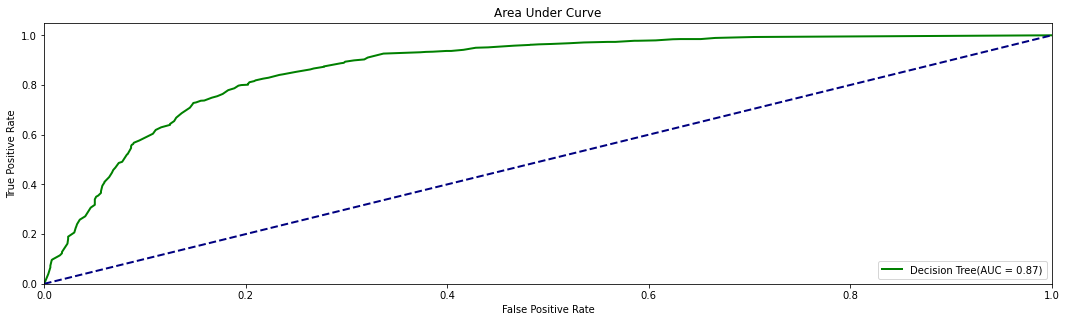

In [340]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt4, tpr_dt4, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [341]:
print (confusion_matrix(y_sans_test, predictions4))

[[1145  328]
 [ 225 1093]]


In [342]:
accuracy_score(y_sans_test, predictions4)

0.8018631314940882

In [343]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_sans_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

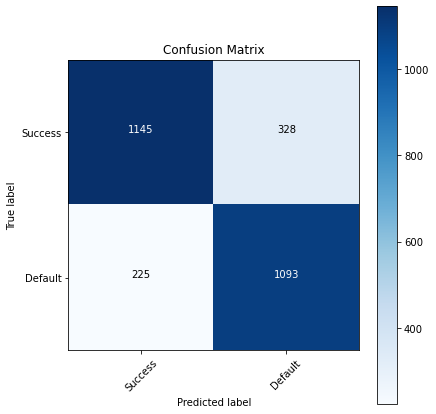

In [344]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions4, normalize=False)
plt.show()

In [345]:
'''Since there is no significant increase in the AUC of ROC Curve when columns
loan, previous, and pdays are present, there is no need to keep them. 
We can use the dataset "dummy_df_sans"'''

'Since there is no significant increase in the AUC of ROC Curve when columns\nloan, previous, and pdays are present, there is no need to keep them. \nWe can use the dataset "dummy_df_sans"'